In [1]:
pip install requests beautifulsoup4 selenium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import urllib.request as request
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time

In [3]:
driver = webdriver.Chrome('C:/Users/82104/Downloads/chromedriver_win32/chromedriver.exe')

In [4]:
driver.get('https://twitter.com/realDonaldTrump')

time.sleep(1)

In [5]:
body = driver.find_element_by_tag_name("body")
num_of_pagedowns = 1000

while num_of_pagedowns:
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.2)
    num_of_pagedowns -= 1
    
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

all_trump_tweet = []

for tweet in soup.find_all('div', class_ = 'js-tweet-text-container'):
    tweet_content = tweet.find("p", {"class": "TweetTextSize TweetTextSize--normal js-tweet-text tweet-text"}).string
    #for a in tweet_content.children:
    #    if isinstance(a, BeautifulSoup.Tag):
    #        a.decompose()
    all_trump_tweet.append(tweet_content)
    
    #print(tweet_content)

In [6]:
Not_url_tweet = list(filter(None, all_trump_tweet))
print(Not_url_tweet)

['The last time I spoke to Debbie Dingell was her call thanking me for granting top memorial and funeral service honors for her then just departed husband, long time Congressman John Dingell. Now I watch her ripping me as part of the Democrats Impeachment Hoax. Really pathetic!', 'pic.twitter.com/zHSZxlgYvT', 'Chuck Schumer sat for years during the Obama Administration and watched as China ripped off the United States. He & the Do Nothing Democrats did NOTHING as this $ carnage took place. Now, without even seeing it, he snipes at our GREAT new deal with China. Too bad Cryin’ Chuck!', 'pic.twitter.com/Z0VHUlAwMD', 'pic.twitter.com/97NvLGxMuj', '....absolutely no pressure. I don’t know of any crime that was committed where the actual victim wasn’t aware of it....and, they got the call, they got the meeting, and they got the money. Unbelievably, the Democrats have weaponized the Impeachment process, they have....', '“There are 31 House Democrats in Trump won Congressional Districts. Thos

In [7]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.tokenize import word_tokenize 
tokenized_sents = [word_tokenize(i) for i in Not_url_tweet]
Tweet1=[]
for i in tokenized_sents:
  Tweet1.extend(i)
print(Tweet1)            # 문장 토큰화

['The', 'last', 'time', 'I', 'spoke', 'to', 'Debbie', 'Dingell', 'was', 'her', 'call', 'thanking', 'me', 'for', 'granting', 'top', 'memorial', 'and', 'funeral', 'service', 'honors', 'for', 'her', 'then', 'just', 'departed', 'husband', ',', 'long', 'time', 'Congressman', 'John', 'Dingell', '.', 'Now', 'I', 'watch', 'her', 'ripping', 'me', 'as', 'part', 'of', 'the', 'Democrats', 'Impeachment', 'Hoax', '.', 'Really', 'pathetic', '!', 'pic.twitter.com/zHSZxlgYvT', 'Chuck', 'Schumer', 'sat', 'for', 'years', 'during', 'the', 'Obama', 'Administration', 'and', 'watched', 'as', 'China', 'ripped', 'off', 'the', 'United', 'States', '.', 'He', '&', 'the', 'Do', 'Nothing', 'Democrats', 'did', 'NOTHING', 'as', 'this', '$', 'carnage', 'took', 'place', '.', 'Now', ',', 'without', 'even', 'seeing', 'it', ',', 'he', 'snipes', 'at', 'our', 'GREAT', 'new', 'deal', 'with', 'China', '.', 'Too', 'bad', 'Cryin', '’', 'Chuck', '!', 'pic.twitter.com/Z0VHUlAwMD', 'pic.twitter.com/97NvLGxMuj', '...', '.absolutely

In [9]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))  

In [10]:
clean_Tweets=[tok for tok in Tweet1 if len(tok.lower())>1 and (tok.lower() not in stop)]  #불용어 처리

In [11]:
clean_Tweets_lower=[element.lower() for element in clean_Tweets]
print(clean_Tweets_lower)   # 소문자화

['last', 'time', 'spoke', 'debbie', 'dingell', 'call', 'thanking', 'granting', 'top', 'memorial', 'funeral', 'service', 'honors', 'departed', 'husband', 'long', 'time', 'congressman', 'john', 'dingell', 'watch', 'ripping', 'part', 'democrats', 'impeachment', 'hoax', 'really', 'pathetic', 'pic.twitter.com/zhszxlgyvt', 'chuck', 'schumer', 'sat', 'years', 'obama', 'administration', 'watched', 'china', 'ripped', 'united', 'states', 'nothing', 'democrats', 'nothing', 'carnage', 'took', 'place', 'without', 'even', 'seeing', 'snipes', 'great', 'new', 'deal', 'china', 'bad', 'cryin', 'chuck', 'pic.twitter.com/z0vhulawmd', 'pic.twitter.com/97nvlgxmuj', '...', '.absolutely', 'pressure', 'know', 'crime', 'committed', 'actual', 'victim', 'aware', '...', '.and', 'got', 'call', 'got', 'meeting', 'got', 'money', 'unbelievably', 'democrats', 'weaponized', 'impeachment', 'process', '...', '31', 'house', 'democrats', 'trump', 'congressional', 'districts', 'dems', 'answer', 'constituents', 'come', '2020'

In [12]:
for i in tokenized_sents:
  tagged_Tweets=nltk.pos_tag(clean_Tweets_lower)
print(tagged_Tweets)    #추출된 단어에 품사 붙이기

[('last', 'JJ'), ('time', 'NN'), ('spoke', 'VBD'), ('debbie', 'RB'), ('dingell', 'RB'), ('call', 'VB'), ('thanking', 'VBG'), ('granting', 'VBG'), ('top', 'JJ'), ('memorial', 'JJ'), ('funeral', 'JJ'), ('service', 'NN'), ('honors', 'NNS'), ('departed', 'VBD'), ('husband', 'NN'), ('long', 'JJ'), ('time', 'NN'), ('congressman', 'NN'), ('john', 'NN'), ('dingell', 'NN'), ('watch', 'NN'), ('ripping', 'VBG'), ('part', 'NN'), ('democrats', 'NNPS'), ('impeachment', 'JJ'), ('hoax', 'NN'), ('really', 'RB'), ('pathetic', 'JJ'), ('pic.twitter.com/zhszxlgyvt', 'NN'), ('chuck', 'NN'), ('schumer', 'JJ'), ('sat', 'VBD'), ('years', 'NNS'), ('obama', 'JJ'), ('administration', 'NN'), ('watched', 'VBD'), ('china', 'NNS'), ('ripped', 'VBD'), ('united', 'JJ'), ('states', 'NNS'), ('nothing', 'NN'), ('democrats', 'NNS'), ('nothing', 'NN'), ('carnage', 'NN'), ('took', 'VBD'), ('place', 'NN'), ('without', 'IN'), ('even', 'RB'), ('seeing', 'VBG'), ('snipes', 'NNS'), ('great', 'JJ'), ('new', 'JJ'), ('deal', 'NN'), 

In [13]:
Clean_Up_Tweets=[word for word, pos in tagged_Tweets if pos in ['NN','NNP','NNPS','NNS','FW','VB','VBD','VBG','VBP','VBZ','JJ','JJR','JJS']] # 원하는 품사만 추출(명사, 동사, 형용사), 'https://sens.tistory.com/454'참고

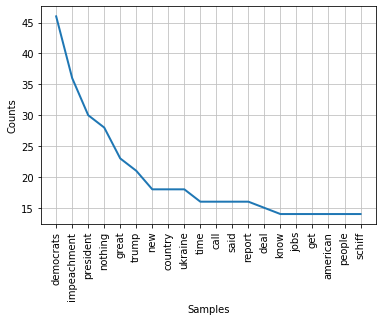

<FreqDist with 1424 samples and 3019 outcomes>


In [25]:
freq_dist_nltk1 = nltk.FreqDist(Clean_Up_Tweets) # word frequency 시각화
freq_dist_nltk1.plot(20, cumulative=False)
print(freq_dist_nltk1)

In [15]:
import pandas as pd
df_fdist = pd.DataFrame(list(freq_dist_nltk1.items()), columns = ['Word', 'Frequency'])
print(df_fdist)

                            Word  Frequency
0                           last          5
1                           time         16
2                          spoke          1
3                           call         16
4                       thanking          1
5                       granting          1
6                            top          3
7                       memorial          1
8                        funeral          1
9                        service          4
10                        honors          1
11                      departed          1
12                       husband          1
13                          long          2
14                   congressman          2
15                          john          3
16                       dingell          1
17                         watch          1
18                       ripping          1
19                          part          2
20                     democrats         46
21                   impeachment

In [16]:
df_fdist['Pos'] = [i[1] for i in nltk.pos_tag(df_fdist['Word'])]
#df_fdist['Pos'] = df_fdist['Pos'][0]
print(df_fdist)

                            Word  Frequency   Pos
0                           last          5    JJ
1                           time         16    NN
2                          spoke          1   VBD
3                           call         16    JJ
4                       thanking          1   VBG
5                       granting          1   VBG
6                            top          3    JJ
7                       memorial          1    JJ
8                        funeral          1    JJ
9                        service          4    NN
10                        honors          1   NNS
11                      departed          1   VBD
12                       husband          1    NN
13                          long          2    RB
14                   congressman          2    JJ
15                          john          3    NN
16                       dingell          1    NN
17                         watch          1    NN
18                       ripping          1   VBG


In [21]:
df_fdist.to_csv("TrumpTweet.csv", mode='w')

In [22]:
import sys

In [18]:
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud

In [19]:
wordcloud = WordCloud(
    background_color='white',
    max_words = 3000,
).generate(' '.join(Clean_Up_Tweets))

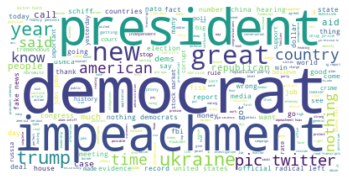

In [20]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()